In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import seaborn as sb

In [2]:
#sb.color_palette("crest", as_cmap=True)

In [3]:
df = pd.read_csv('../data/mergedData.csv')
df.set_index('Timestamp', inplace=True)
df.head()

,Pos1m3Temp,Pos1m3DO,Pos1m6Temp,Pos1m6DO,Pos1m9Temp,Pos1m9DO,Pos1m12Temp,Pos1m12DO,Pos4m3Temp,Pos4m3DO,...,CurrentVertical32m,CurrentVertical33m,CurrentVertical34m,CurrentVertical35m,CurrentVertical36m,CurrentVertical37m,CurrentVertical38m,CurrentVertical39m,CurrentVertical40m,CurrentVertical41m
Timestamp,,,,,,,,,,,,,,,,,,,,,
07-02 15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-02 15:03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-02 15:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-02 15:05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
07-02 15:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Current plots

## Heatmaps

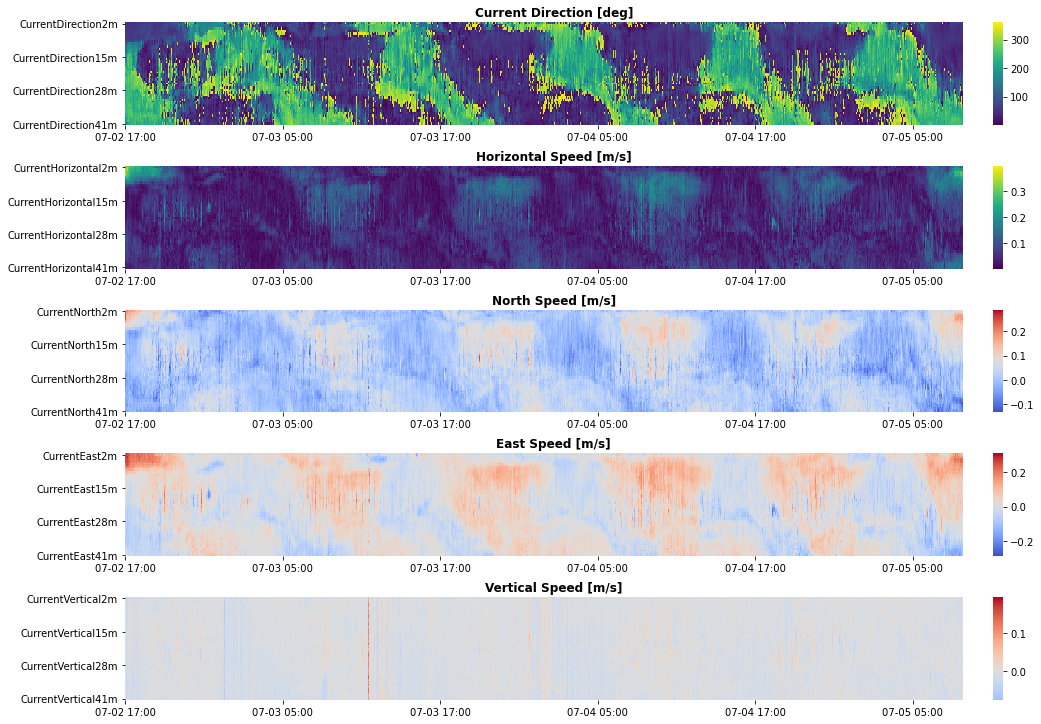

In [4]:
# TODO: Fix axis labels and ticks

fig, ax = plt.subplots(5,1,figsize=(15,10))
fig.tight_layout()
fig.subplots_adjust(hspace=0.4)

#gs = gridspec.GridSpec(6,5)

ax[0].set_title('Current Direction [deg]', fontweight='bold')
ax[1].set_title('Horizontal Speed [m/s]', fontweight='bold')
ax[2].set_title('North Speed [m/s]', fontweight='bold')
ax[3].set_title('East Speed [m/s]', fontweight='bold')
ax[4].set_title('Vertical Speed [m/s]', fontweight='bold')

currentDir = df['07-02 17:00':].loc[:,'CurrentDirection2m':'CurrentDirection41m'].transpose()
currentHori = df['07-02 17:00':].loc[:,'CurrentHorizontal2m':'CurrentHorizontal41m'].transpose()
currentVert = df['07-02 17:00':].loc[:,'CurrentVertical2m':'CurrentVertical41m'].transpose()
currentNorth = df['07-02 17:00':].loc[:,'CurrentNorth2m':'CurrentNorth41m'].transpose()
currentEast = df['07-02 17:00':].loc[:,'CurrentEast2m':'CurrentEast41m'].transpose()
tideLvl = df['07-02 17:00':].loc[:,'TideLevel'].dropna().transpose()

sb.heatmap(currentDir, xticklabels=720, yticklabels = 13, cmap='viridis', ax=ax[0], cbar_kws=dict(pad=0.01, aspect=10))
sb.heatmap(currentHori, xticklabels=720, yticklabels = 13, cmap='viridis', ax=ax[1], cbar_kws=dict(pad=0.01, aspect=10))
sb.heatmap(currentNorth, xticklabels=720, yticklabels = 13, cmap='coolwarm', ax=ax[2], cbar_kws=dict(pad=0.01, aspect=10))
sb.heatmap(currentEast, xticklabels=720, yticklabels = 13, cmap='coolwarm', ax=ax[3], cbar_kws=dict(pad=0.01, aspect=10))
sb.heatmap(currentVert, xticklabels=720, yticklabels = 13, cmap='coolwarm', ax=ax[4], center = 0.00, cbar_kws=dict(pad=0.01, aspect=10))

# TODO fix tide plot
#tideLvl.plot(ax=ax[5])
#ax[5].margins(0.0, 0.1)

for axis in ax:
    axis.xaxis.label.set_visible(False)
    #axis.yaxis.set_label('Depth')

## Center oxygen measurements

### Temperature

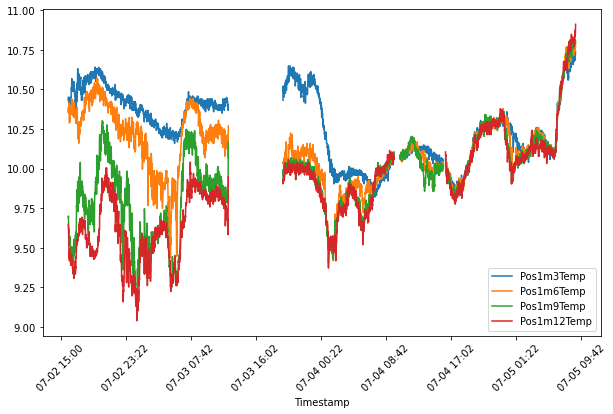

In [8]:
for i in range(3,13,3):
    df.loc[:,'Pos1m' + str(i) + 'Temp'].plot(rot = 45, legend=True, figsize=(10,6))